In [ ]:
pip install --upgrade pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
import pandas_datareader.data as web
from datetime import datetime

In [ ]:
end = datetime(2022,1,1)
start = datetime(2021,3,1)

bitc = web.DataReader('BTC-USD', 'yahoo',start, end)

ethc = web.DataReader('ETH-USD', 'yahoo',start, end)

ethc['Name'] = "ETH"
bitc['Name'] = "BTC"

In [ ]:
result = pd.DataFrame()
frames = [ethc, bitc]
result = pd.concat(frames)
result

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2021-03-01,1567.694580,1416.416138,1417.151123,1564.707642,24032838645,1564.707642,ETH
2021-03-02,1597.610107,1461.325439,1564.063477,1492.608765,22523669722,1492.608765,ETH
2021-03-03,1650.360596,1481.905762,1491.451172,1575.853149,22674780680,1575.853149,ETH
2021-03-04,1622.953857,1511.103394,1574.623779,1541.914307,22906118718,1541.914307,ETH
2021-03-05,1547.878174,1450.891357,1541.541748,1533.275024,21067146937,1533.275024,ETH
...,...,...,...,...,...,...,...
2021-12-29,48119.742188,46201.496094,47623.871094,46444.710938,30049226299,46444.710938,BTC
2021-12-30,47879.964844,46060.312500,46490.605469,47178.125000,26686491018,47178.125000,BTC
2021-12-31,48472.527344,45819.953125,47169.371094,46306.445312,36974172400,46306.445312,BTC


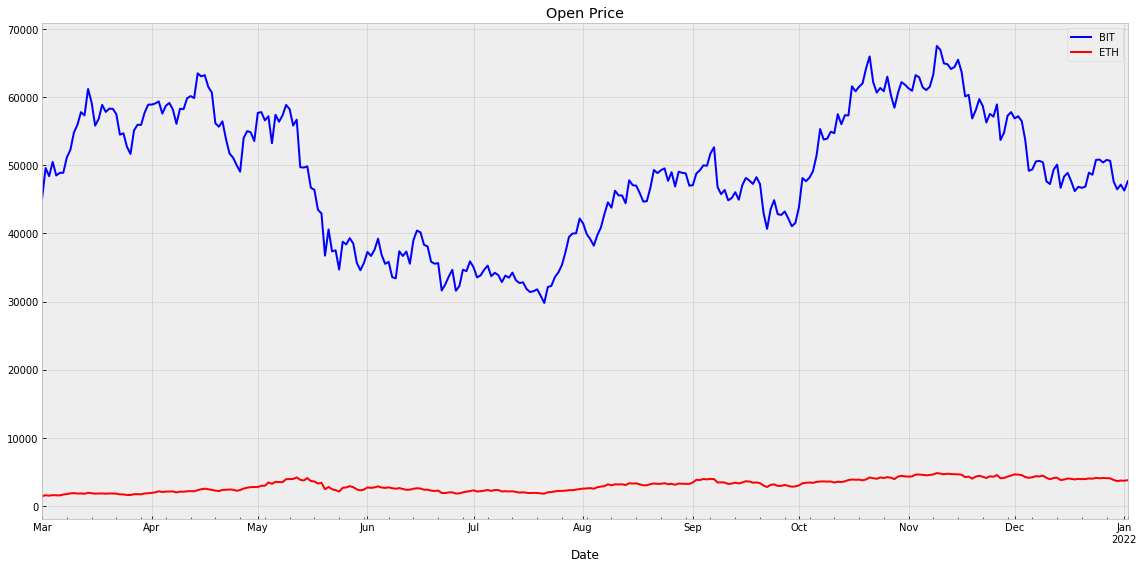

In [ ]:
bitc['Open'].plot(figsize = (16,8),label = 'BIT', title ='Open Price', color = "blue")
ethc['Open'].plot(figsize = (16,8),label = 'ETH', color = "red")

plt.legend()
plt.tight_layout()


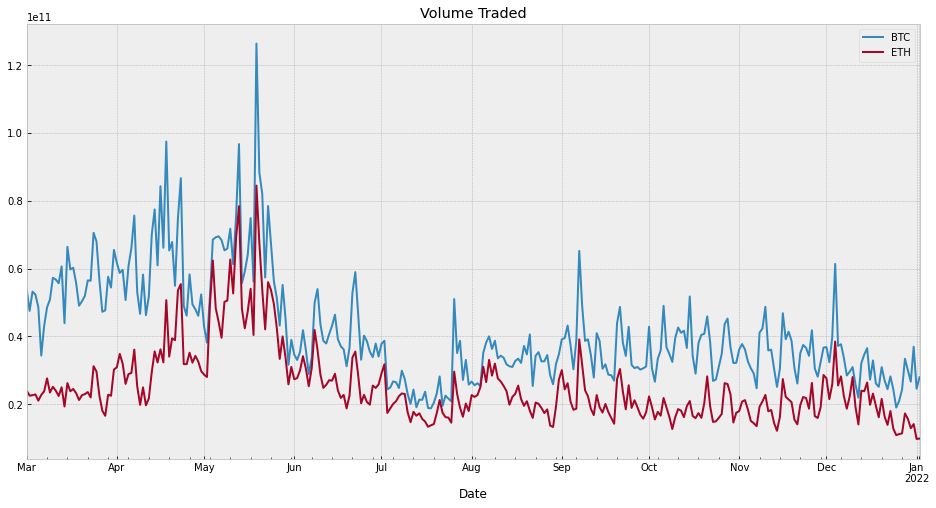

In [ ]:
bitc['Volume'].plot(figsize = (16,8), label = 'BTC', title = 'Volume Traded')
ethc['Volume'].plot(figsize = (16,8), label = 'ETH')

plt.legend()

In [ ]:
bitc['Volume'].idxmax()

Timestamp('2021-05-19 00:00:00')

Text(0, 0.5, 'Total Traded')

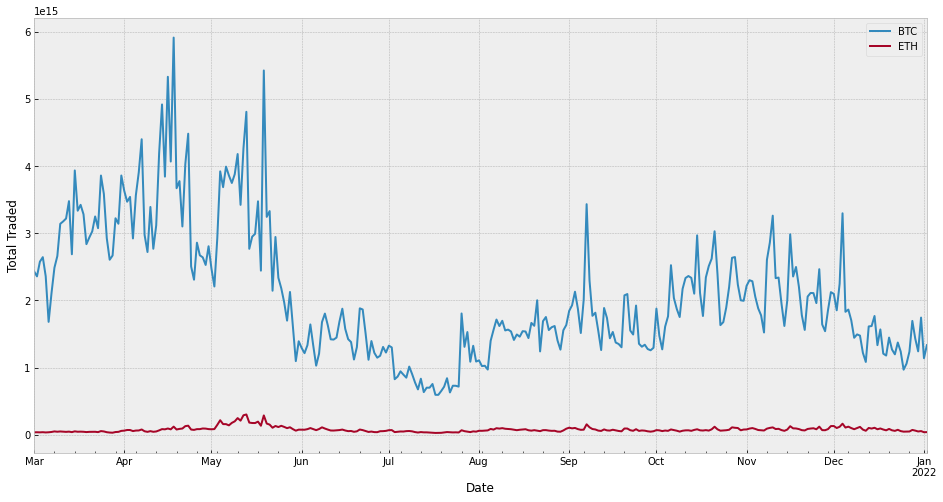

In [ ]:
bitc["Total Traded"] = bitc['Open'] * bitc['Volume']
ethc["Total Traded"] = ethc['Open'] * ethc['Volume']

bitc["Total Traded"].plot(label = 'BTC', figsize = (16,8))
ethc["Total Traded"].plot(label = 'ETH')

plt.legend()
plt.ylabel('Total Traded')


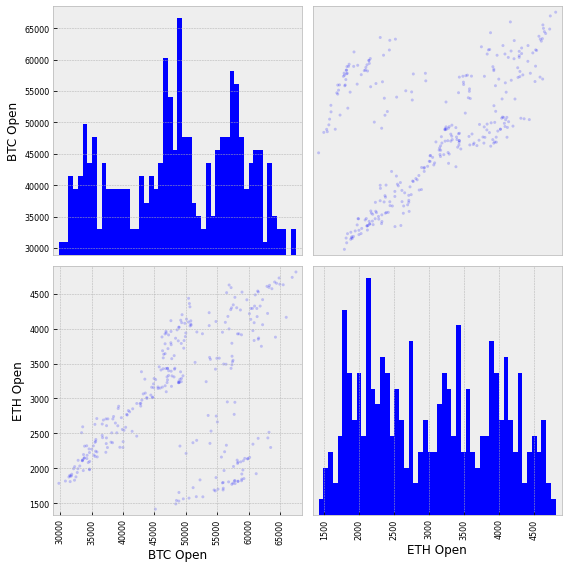

In [ ]:
from pandas.plotting import scatter_matrix

crypto_curr = pd.concat([bitc['Open'], ethc['Open']], axis=1)
crypto_curr.columns = ['BTC Open', 'ETH Open']

scatter_matrix(crypto_curr ,figsize=(8,8), alpha = 0.2, hist_kwds={'bins':50, \
                                'color':'blue'},color='blue')
plt.tight_layout()

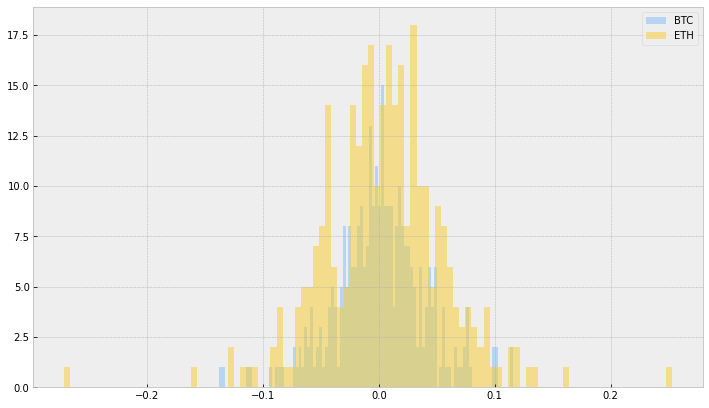

In [ ]:
# Method 1: Using shift
bitc['returns'] = (bitc['Close']/bitc['Close'].shift(1)) - 1
bitc['returns'] = bitc['Close'].pct_change(1)

ethc['returns'] = (ethc['Close']/ethc['Close'].shift(1)) - 1
ethc['returns'] = ethc['Close'].pct_change(1)

plt.style.use('bmh')
bitc['returns'].hist(bins=100, figsize=(12,7), color = '#81BEF7', alpha = 0.5, label='BTC')
ethc['returns'].hist(bins=100, figsize=(12,7), color = '#FACC2E', alpha = 0.5, label='ETH')

plt.legend(loc = 0)

In [ ]:
X = bitc[['Open', 'Close']]
Y = bitc[['returns']]

X = X[:-1].reset_index()
Y = Y[1:].reset_index()

X = X[['Open', 'Close']]
Y = Y['returns']


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)
reg = LinearRegression().fit(trainX, trainY)
y_pred = reg.predict(testX)

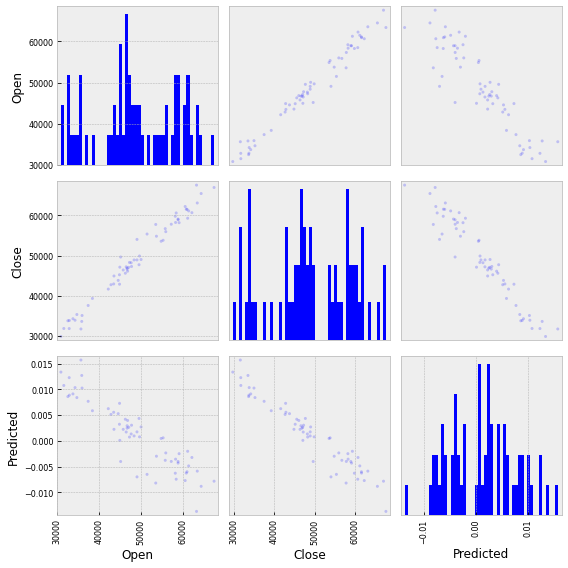

In [ ]:
y_pred = pd.DataFrame(y_pred)
testOpen = testX['Open'].reset_index().drop(['index'], axis = 1)
testClose = testX['Close'].reset_index().drop(['index'], axis = 1)
compY = testY.reset_index().drop(['index'], axis = 1)

reg_scatter = pd.concat([testOpen, testClose, y_pred], axis=1)

reg_scatter.columns = ['Open', 'Close', 'Predicted']

scatter_matrix(reg_scatter ,figsize=(8,8), alpha = 0.2, hist_kwds={'bins':50, \
                                'color':'blue'},color='blue')
plt.tight_layout()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(compY, y_pred)

0.0017833749298751327

In [ ]:
b = reg.intercept_
m = reg.coef_

print(" Slope = " + str(m))
print(" Intercept = " + str(b))

 Slope = [ 1.15071035e-06 -1.70617410e-06]
 Intercept = 0.028721400283777645


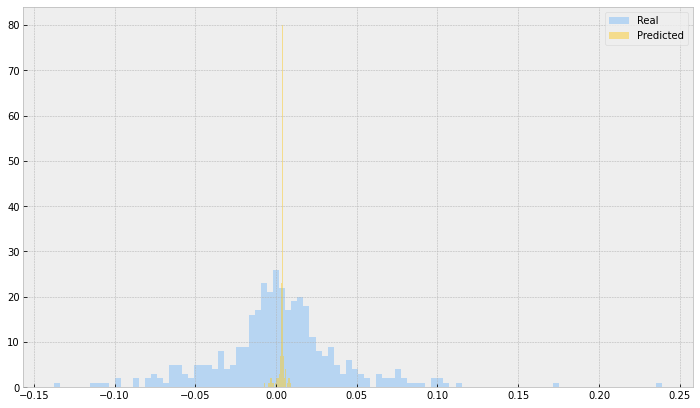

In [ ]:
plt.style.use('bmh')
compare['returns'].hist(bins=100, figsize=(12,7), color = '#81BEF7', alpha = 0.5, label='Real')
compare[0].hist(bins=100, figsize=(12,7), color = '#FACC2E', alpha = 0.5, label='Predicted')

plt.legend(loc = 0)